In [2]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
import os

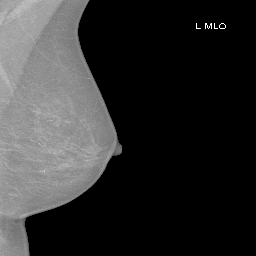

In [4]:
img = Image.open("data/256x256_png_images/5_640805896.png", "r")
img

In [6]:
img_list = os.listdir("data/256x256_png_images")

img_pixels = []

for img in img_list:
    img_path = os.path.join("data/256x256_png_images/", img)
    pixels = np.array(Image.open(img_path).getdata())
    img_pixels.append(pixels)

In [7]:
img_pixels = np.array(img_pixels)
img_pixels

array([[  0,   0,   0, ...,   0,   0,   0],
       [173, 175, 170, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 253, 252, 249],
       [  0,   0,   0, ..., 254, 254, 254]])

In [8]:
img_pixels.shape

(54706, 65536)

In [13]:
metadata = pd.read_csv("data/train.csv")
metadata

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [14]:
y = metadata['cancer']

In [15]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 54706 entries, 0 to 54705
Series name: cancer
Non-Null Count  Dtype
--------------  -----
54706 non-null  int64
dtypes: int64(1)
memory usage: 427.5 KB


In [ ]:
#Run PCA

#Fit PCA on train data
new_feature_count = 50
pca = PCA(n_components=new_feature_count)
X_train_pca = pca.fit_transform(img_pixels)

pca.explained_variance_ratio_.sum()